<a href="https://colab.research.google.com/github/vjuge/oc-iml/blob/vjuge%2Fissue13/modules/P7/module_P7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install yfinance
!pip install scalecast

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.0 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 346 kB 25.5 MB/s 
     |████████████████████████████████| 216 kB 81.9 MB/s 
     |████████████████████████████████| 133 kB 81.3 MB/s 
  Created wheel for scalecast: filename=SCALECAST-0.14.1-py3-none-any.whl size=95002 sha256=9fdcf1e2964340bc37fb466a2085e528c7d0c3ce743ea3c52410fcb15421d9e7
  Stored in directory: /root/.cache/pip/wheels/51/40/46/44bb5dcbb0ac24c3835cc087522e81cb0efda7f5b85e77f83d
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=bd12c4c14df516124a200ee8da94c520fda5c1524ba85c98edf57e63e0

In [3]:
import json
import csv
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from scalecast.Forecaster import Forecaster
from scalecast.auxmodels import auto_arima
from sklearn.model_selection import train_test_split
import tensorflow as tf
from datetime import datetime
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize':(30,10)})

import sys
import os

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
df_btc_usd = yf.download("BTC-USD")
df_btc_usd.shape
df_btc_usd.dtypes
df_btc_usd.columns
df_btc_usd.head()
df_btc_usd.index

df_btc_usd = df_btc_usd.asfreq('d')
pd.infer_freq(df_btc_usd.asfreq('d').index)


[*********************100%***********************]  1 of 1 completed


(2919, 6)

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


DatetimeIndex(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20',
               '2014-09-21', '2014-09-22', '2014-09-23', '2014-09-24',
               '2014-09-25', '2014-09-26',
               ...
               '2022-09-04', '2022-09-05', '2022-09-06', '2022-09-07',
               '2022-09-08', '2022-09-09', '2022-09-10', '2022-09-11',
               '2022-09-12', '2022-09-14'],
              dtype='datetime64[ns]', name='Date', length=2919, freq=None)

'D'

In [5]:
# keep only CLose column
df_btc_usd = df_btc_usd['Close']
df_btc_usd = df_btc_usd[df_btc_usd.index > '2021-01-01']
df_btc_usd.shape


(621,)

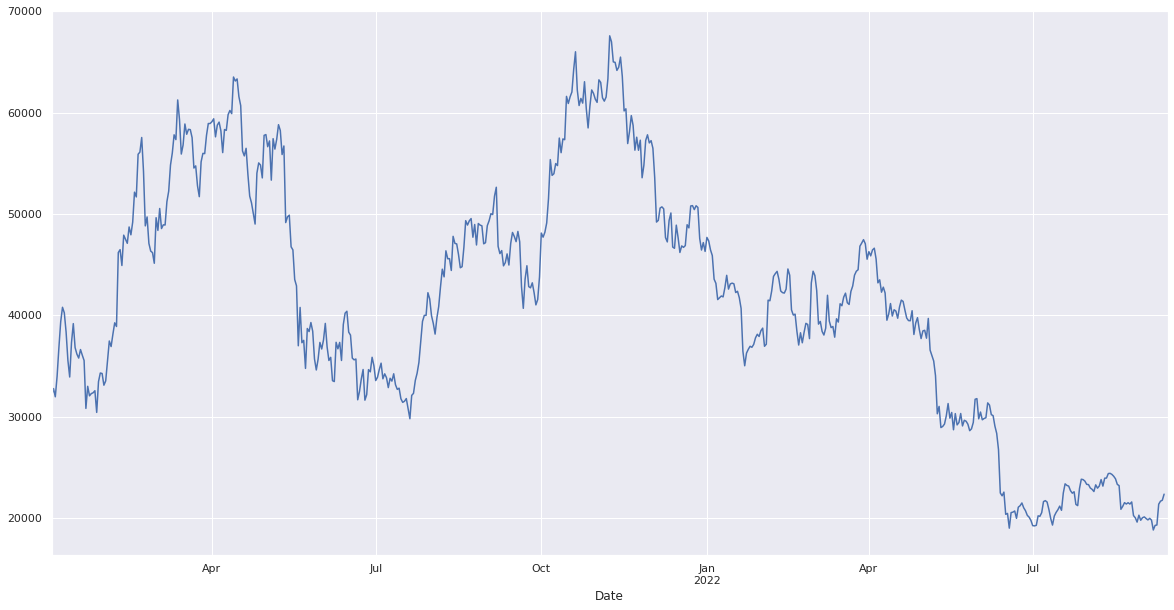

In [6]:
df_btc_usd.plot(figsize=(20, 10))

## ARIMA

In [7]:
f = Forecaster(y=df_btc_usd, current_dates=df_btc_usd.index)
f

Forecaster(
    DateStartActuals=2021-01-03T00:00:00.000000000
    DateEndActuals=2022-09-14T00:00:00.000000000
    Freq=D
    N_actuals=620
    ForecastLength=0
    Xvars=[]
    Differenced=0
    TestLength=1
    ValidationLength=1
    ValidationMetric=rmse
    ForecastsEvaluated=[]
    CILevel=0.95
    BootstrapSamples=100
    CurrentEstimator=None
    GridsFile=Grids
)

### Naive Approach

In [8]:
f.generate_future_dates(12)
f.set_test_length(.2)
f.set_estimator('arima')
f.manual_forecast(call_me='arima1')

Text(0.5, 1.0, 'ARIMA Test-Set Performance')

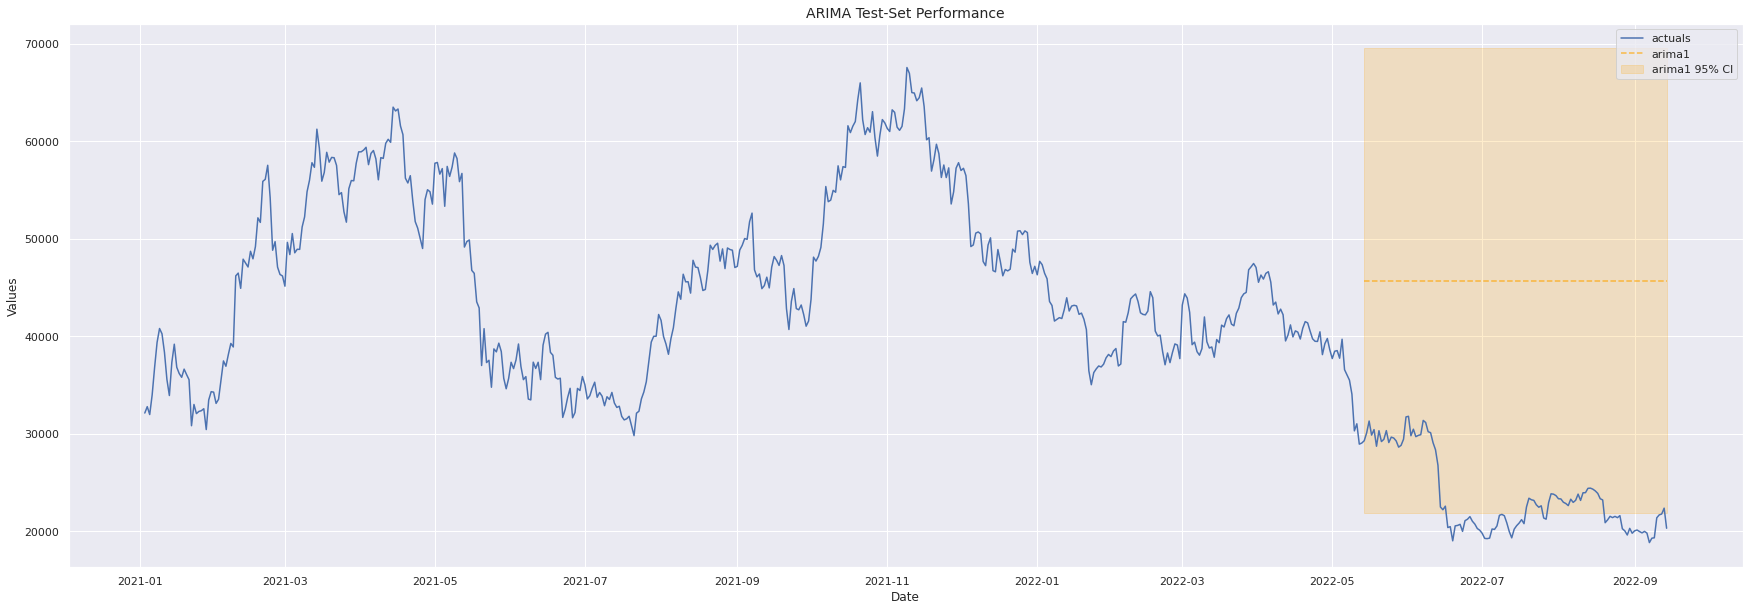

In [9]:
f.plot_test_set(ci=True)
plt.title('ARIMA Test-Set Performance',size=14)
plt.show()

Text(0.5, 1.0, 'ARIMA Forecast Performance')

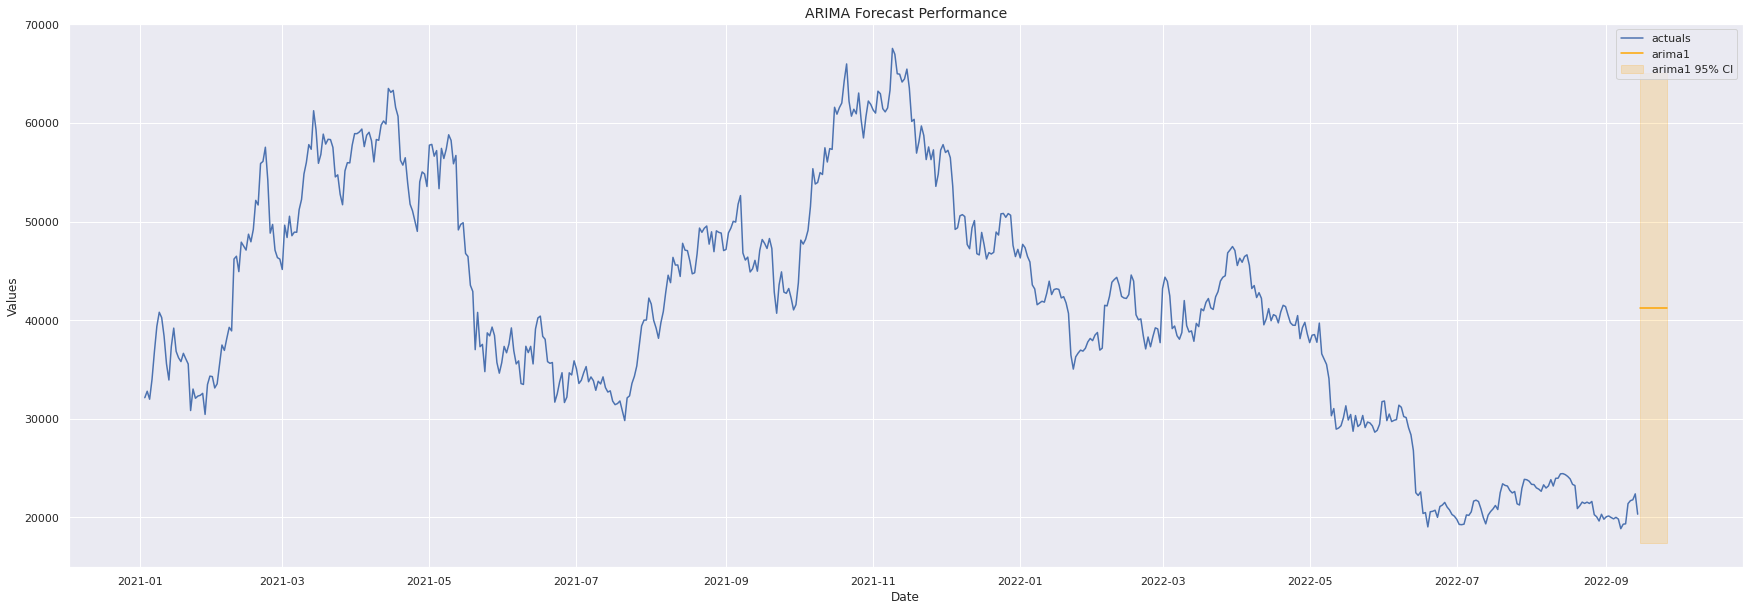

In [10]:
f.plot(ci=True)
plt.title('ARIMA Forecast Performance',size=14)
plt.show()

### Human Interpretation - Iterative Approach

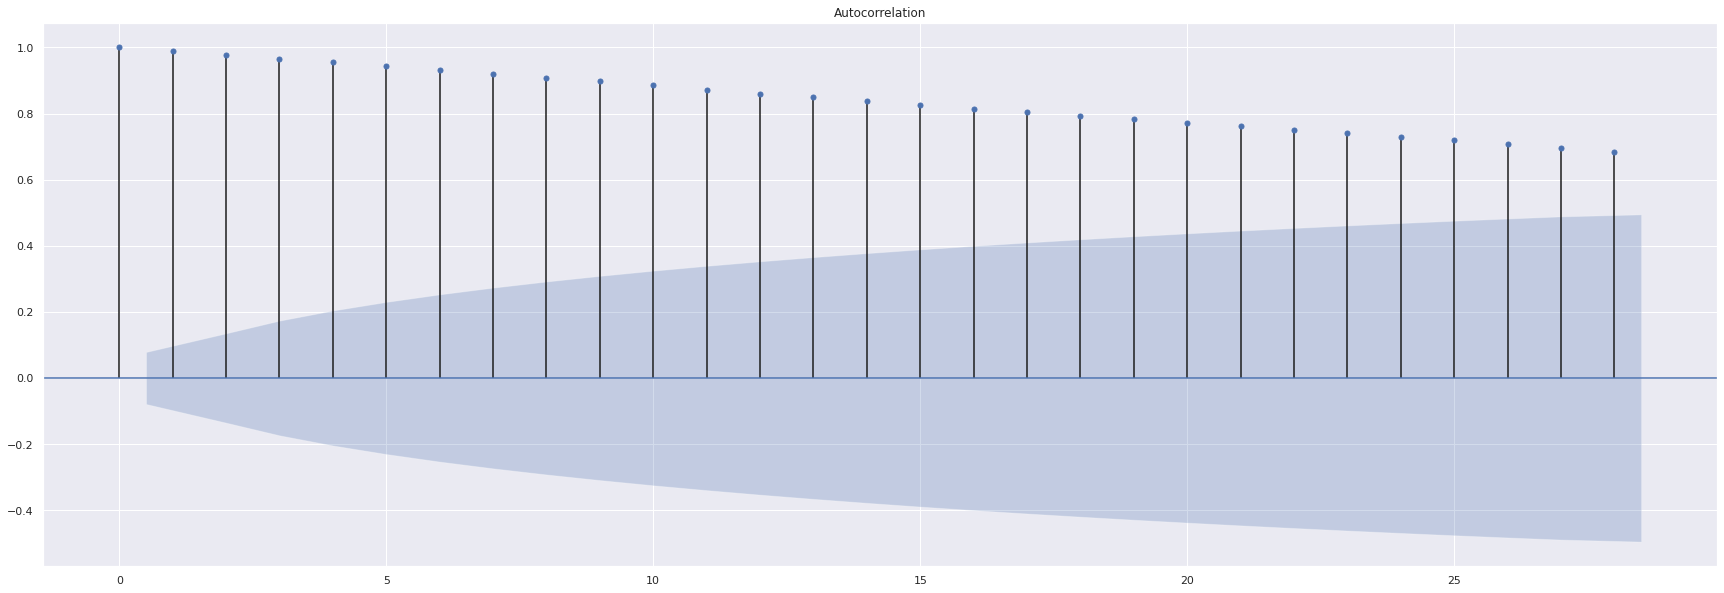

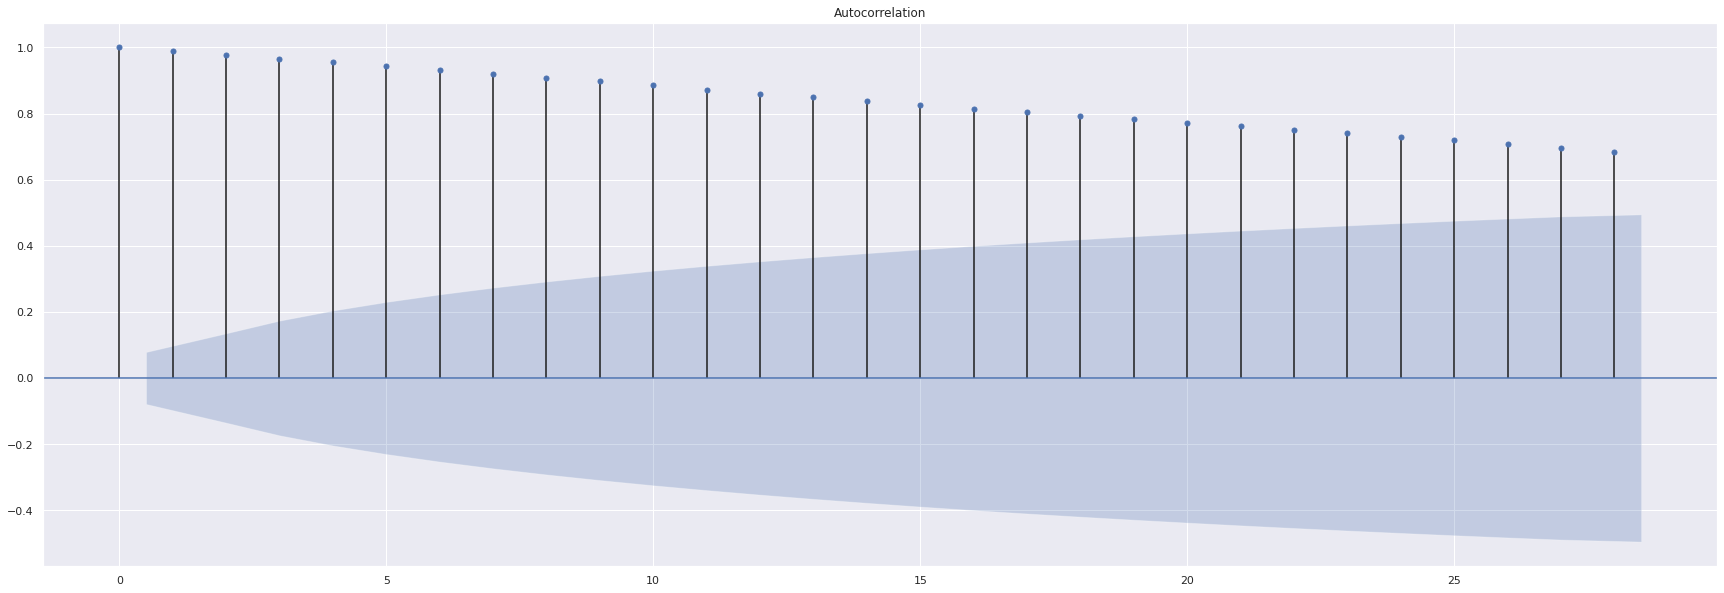

In [11]:
f.plot_acf()
plt.show()

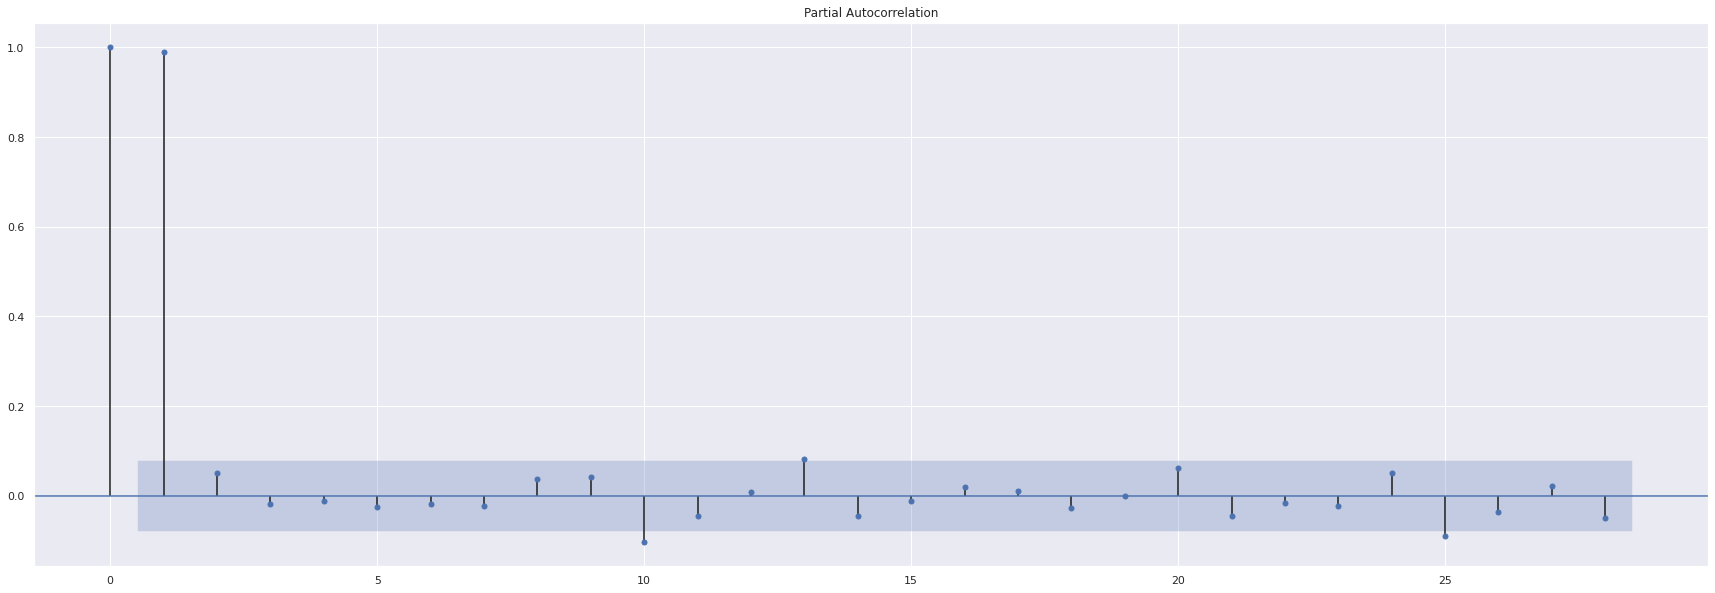

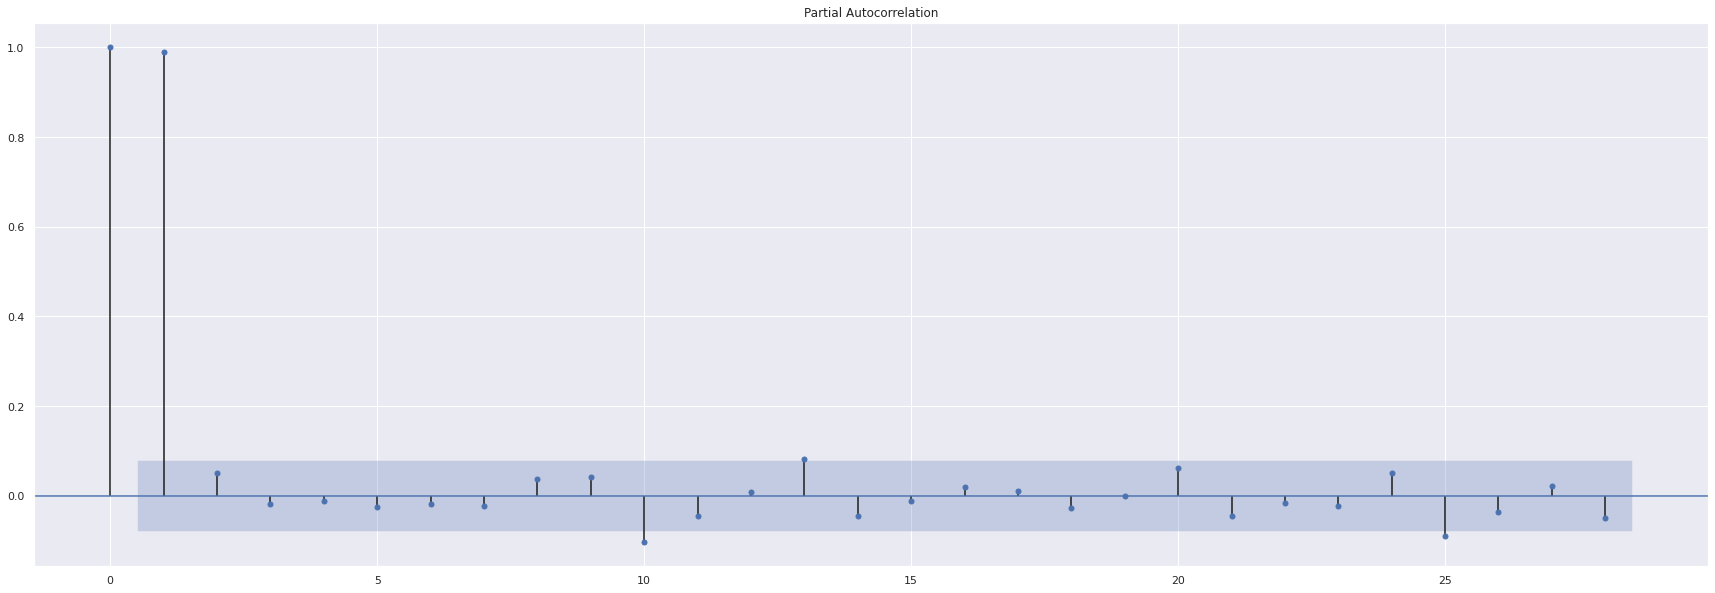

In [12]:
f.plot_pacf()
plt.show()

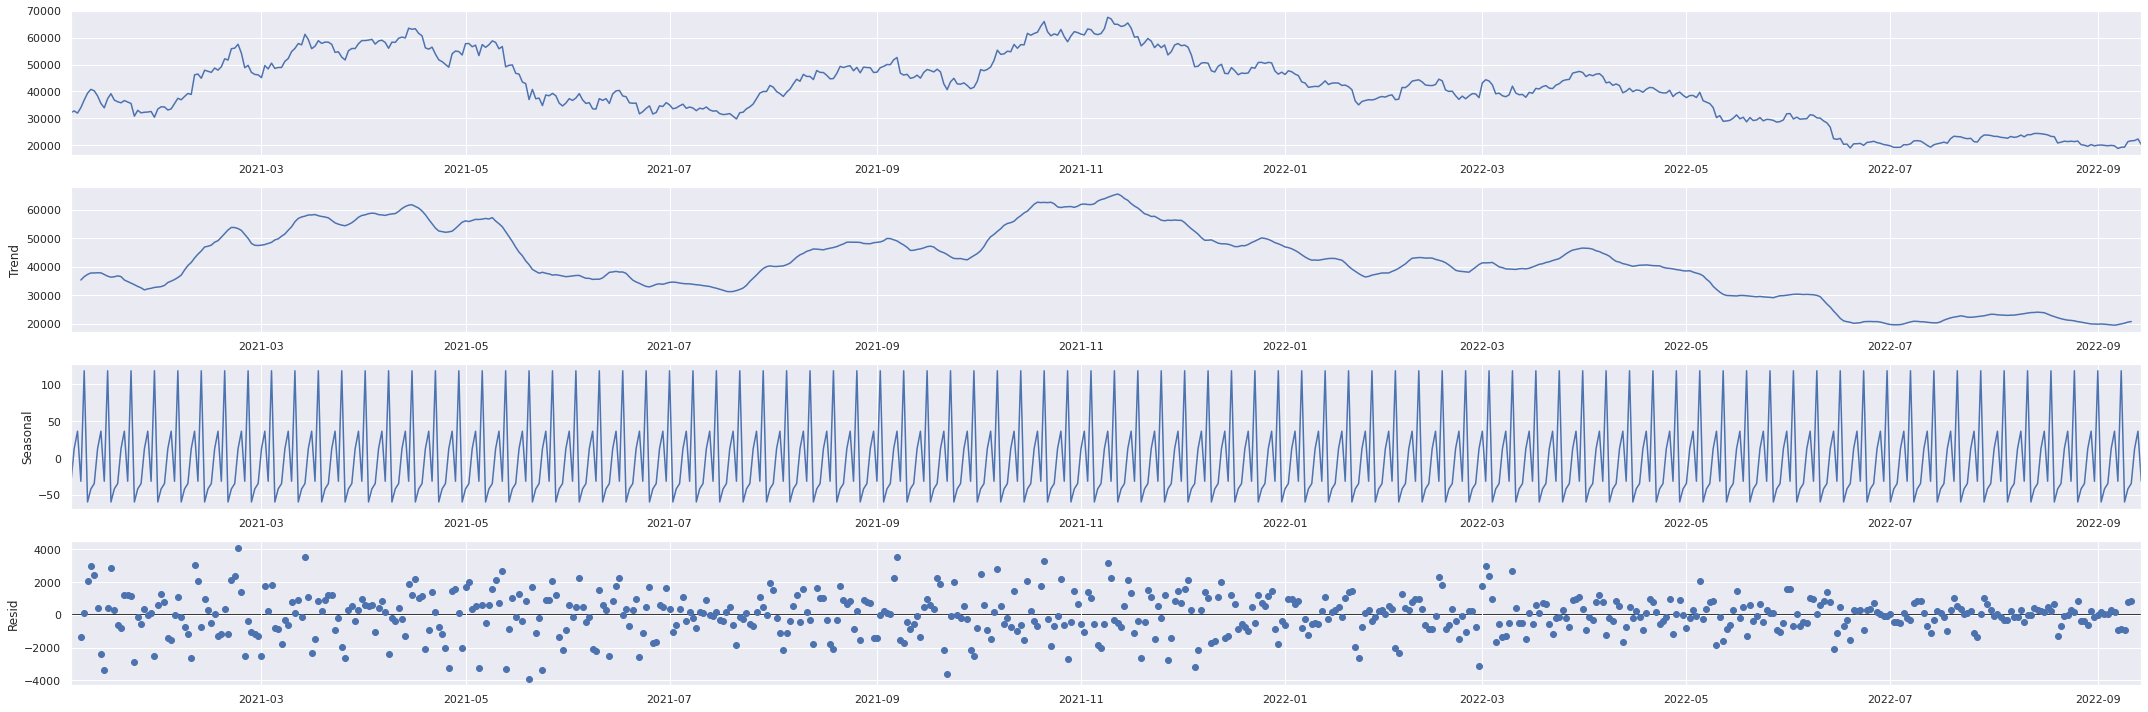

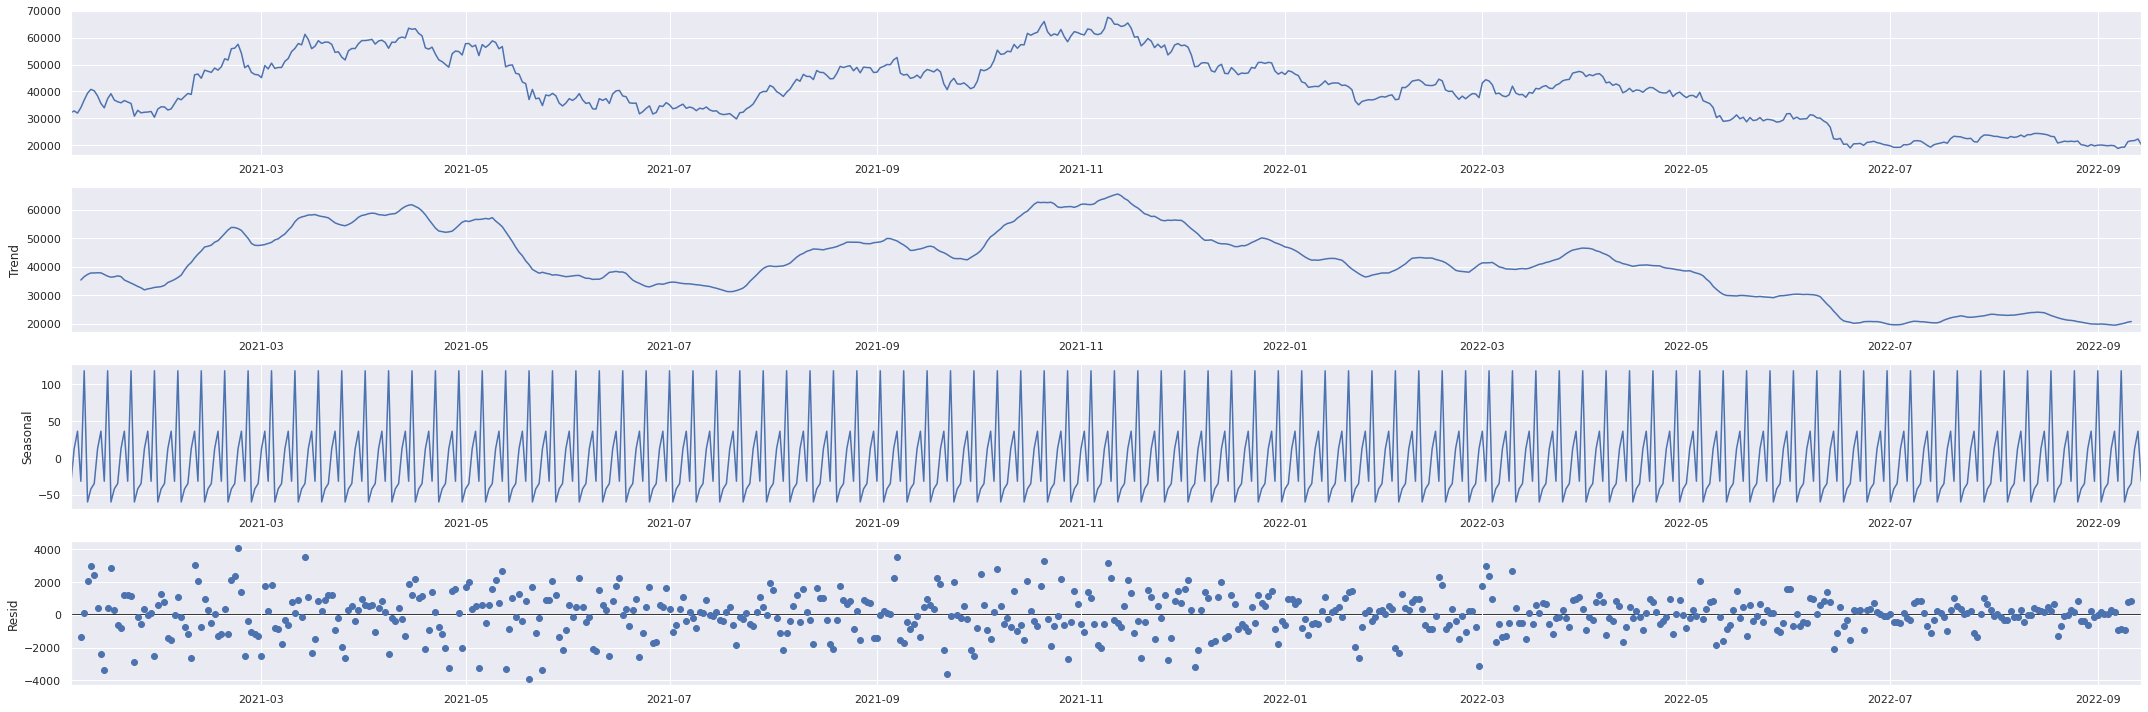

In [13]:
f.seasonal_decompose().plot()
plt.show()

In [14]:
stat, pval, _, _, _, _ = f.adf_test(full_res=True)
print(stat)
print(pval)

-1.3277312230133194
0.616391704112651


In [15]:
f.manual_forecast(order=(1,1,1),seasonal_order=(2,1,1,12),call_me='arima2')


LinAlgError: ignored

ValueError: ignored

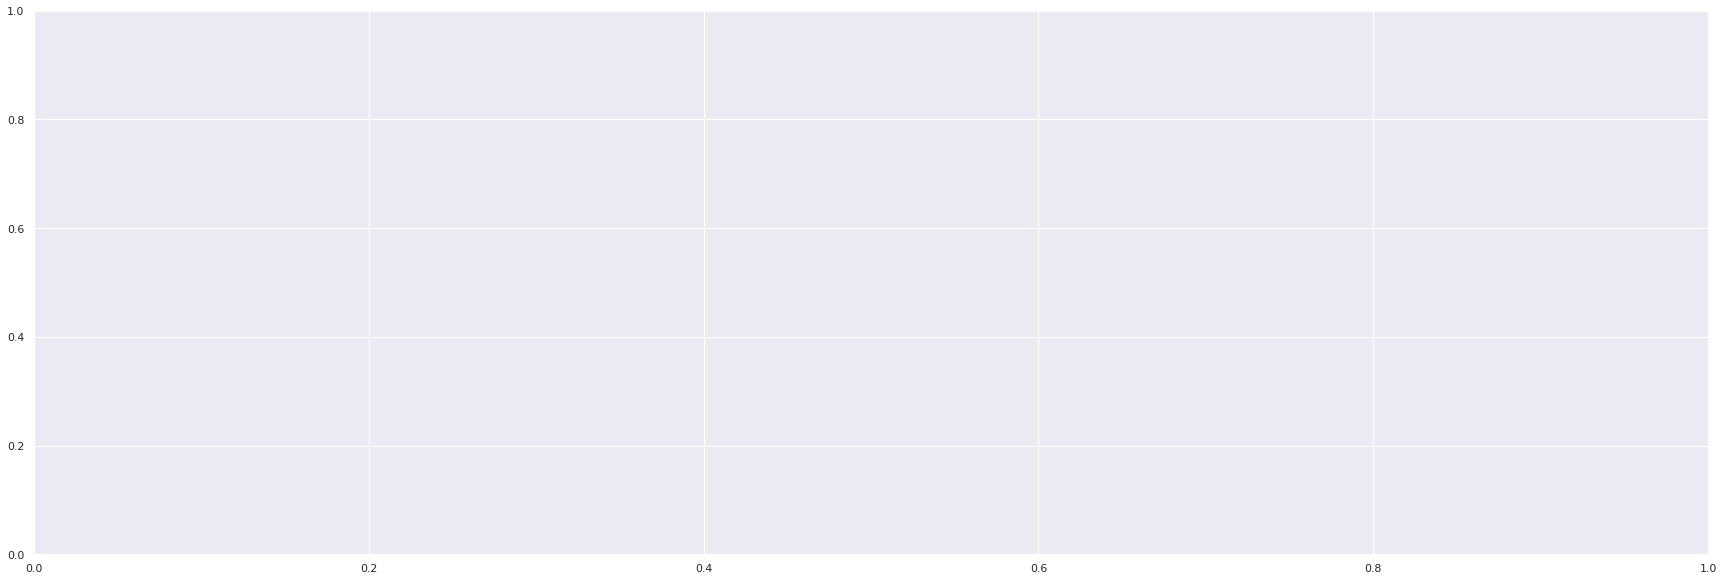

In [16]:
f.plot_test_set(ci=True,models='arima2')
plt.title('ARIMA Test-Set Performance',size=14)
plt.show()

In [ ]:
f.plot(ci=True,models='arima2')
plt.title('ARIMA Forecast Performance',size=14)
plt.show()

In [ ]:
f.regr.summary()


### Auto ARIMA Approach

In [ ]:
auto_arima(
    f,
    start_P=1,
    start_q=1,
    max_p=6,
    max_q=6,
    m=12,
    seasonal=True,
    max_P=2,
    max_D=2,
    max_Q=2,
    max_d=2,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True,
    information_criterion="aic",
    alpha=0.05,
    scoring='mse',
    call_me='arima3',
)

In [ ]:
f.plot_test_set(ci=True,models='arima3')
plt.title('ARIMA Test-Set Performance',size=14)
plt.show()

In [ ]:
f.plot(ci=True,models='arima3')
plt.title('ARIMA Forecast Performance',size=14)
plt.show()

In [ ]:
f.regr.summary()

## LSTM

In [17]:
f = Forecaster(y=df_btc_usd, current_dates=df_btc_usd.index)
f

Forecaster(
    DateStartActuals=2021-01-03T00:00:00.000000000
    DateEndActuals=2022-09-14T00:00:00.000000000
    Freq=D
    N_actuals=620
    ForecastLength=0
    Xvars=[]
    Differenced=0
    TestLength=1
    ValidationLength=1
    ValidationMetric=rmse
    ForecastsEvaluated=[]
    CILevel=0.95
    BootstrapSamples=100
    CurrentEstimator=None
    GridsFile=Grids
)

Text(0.5, 1.0, 'Orig Series')

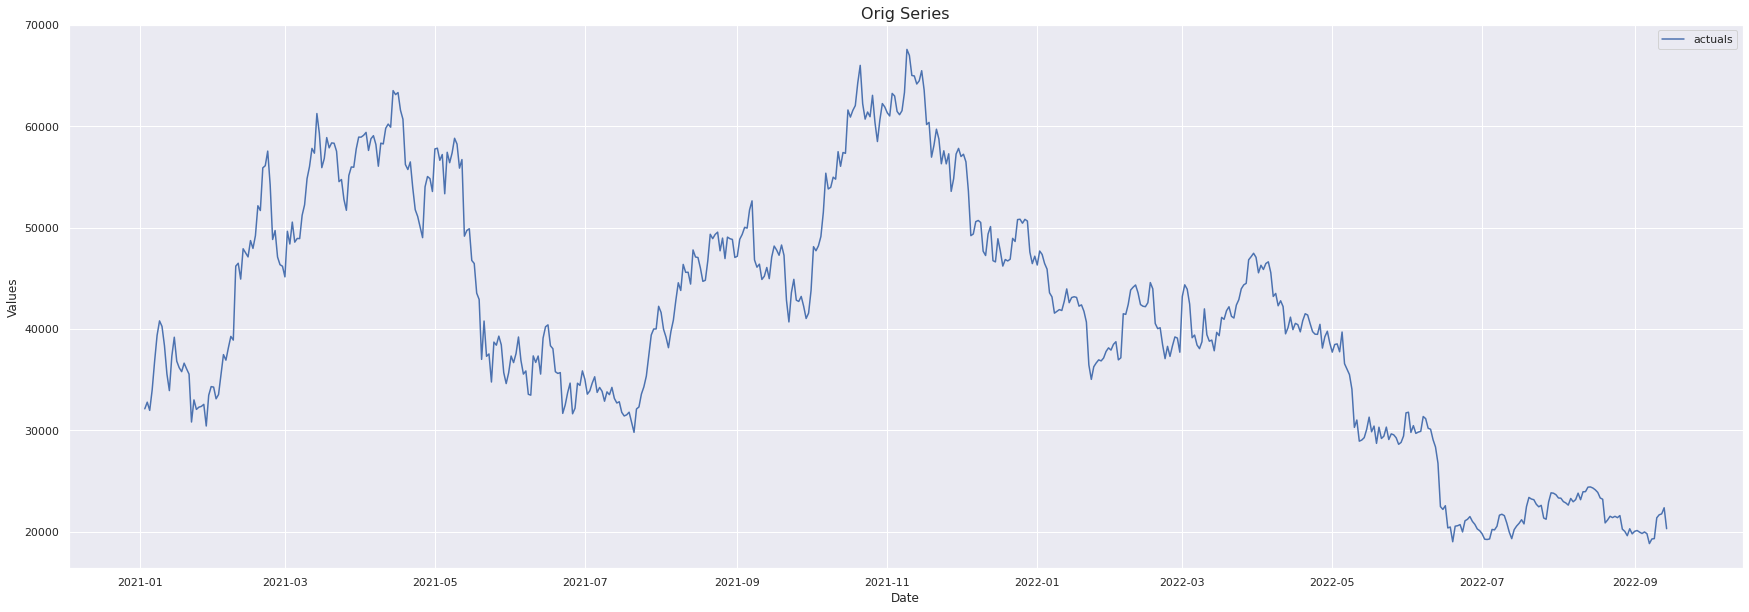

In [18]:
f.plot()
plt.title('Orig Series',size=16)
plt.show()

In [19]:
critical_pval = 0.05
print('-'*100)
print('Augmented Dickey-Fuller results:')
stat, pval, _, _, _, _ = f.adf_test(full_res=True)
print('the test-stat value is: {:.2f}'.format(stat))
print('the p-value is {:.4f}'.format(pval))
print('the series is {}'.format('stationary' if pval < critical_pval else 'not stationary'))
print('-'*100)

----------------------------------------------------------------------------------------------------
Augmented Dickey-Fuller results:
the test-stat value is: -1.33
the p-value is 0.6164
the series is not stationary
----------------------------------------------------------------------------------------------------


### Prepare Forecast for LSTM

In [20]:
f.set_test_length(12)
f.generate_future_dates(12)

### LSTM Model

In [21]:
f.set_estimator('lstm')
f.manual_forecast(call_me='lstm_default')

19/19 [==============================] - 2s 3ms/step - loss: 0.4367


Text(0.5, 1.0, 'Default Test-set Performance')

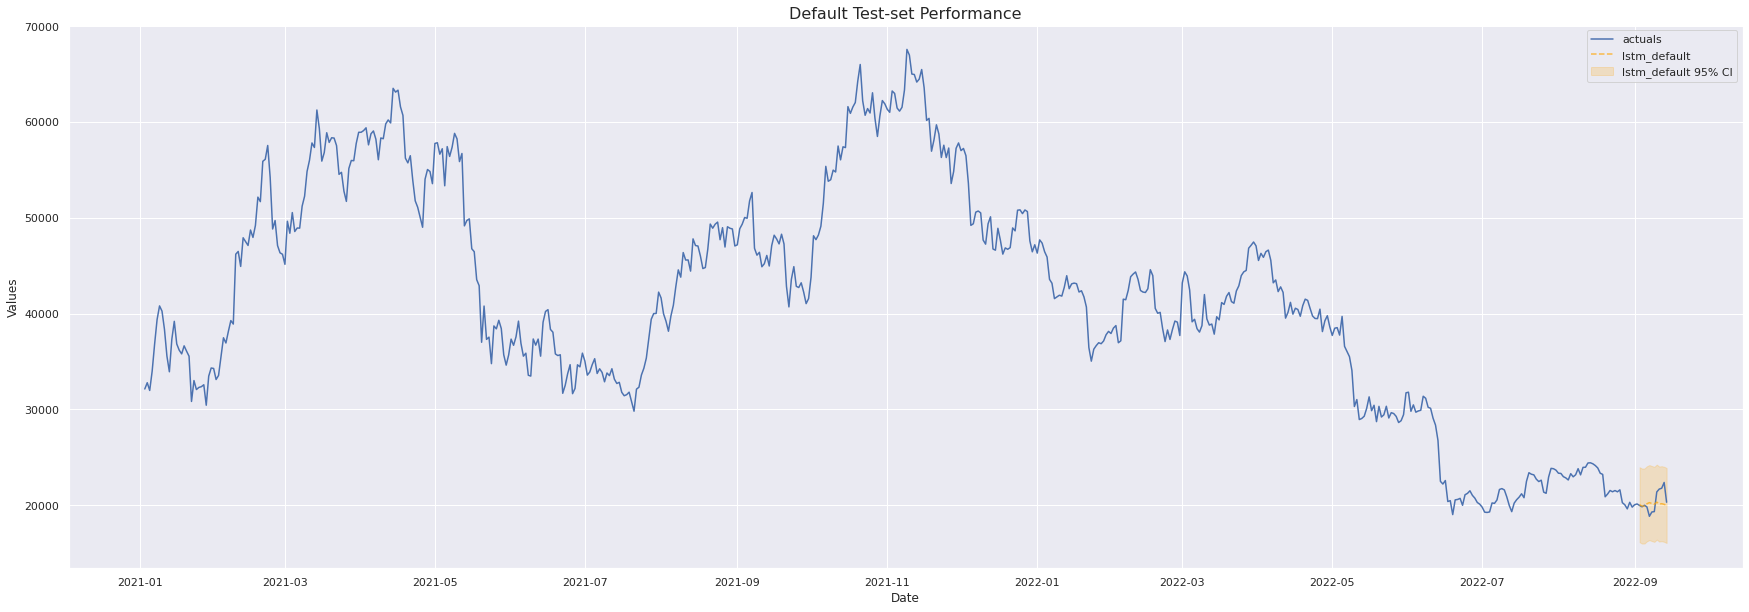

In [22]:
f.plot_test_set(ci=True)
plt.title('Default Test-set Performance',size=16)
plt.show()

In [23]:
f.manual_forecast(call_me='lstm_24lags',lags=24)

19/19 [==============================] - 2s 5ms/step - loss: 0.4128


Text(0.5, 1.0, 'All Models Test-set Performance')

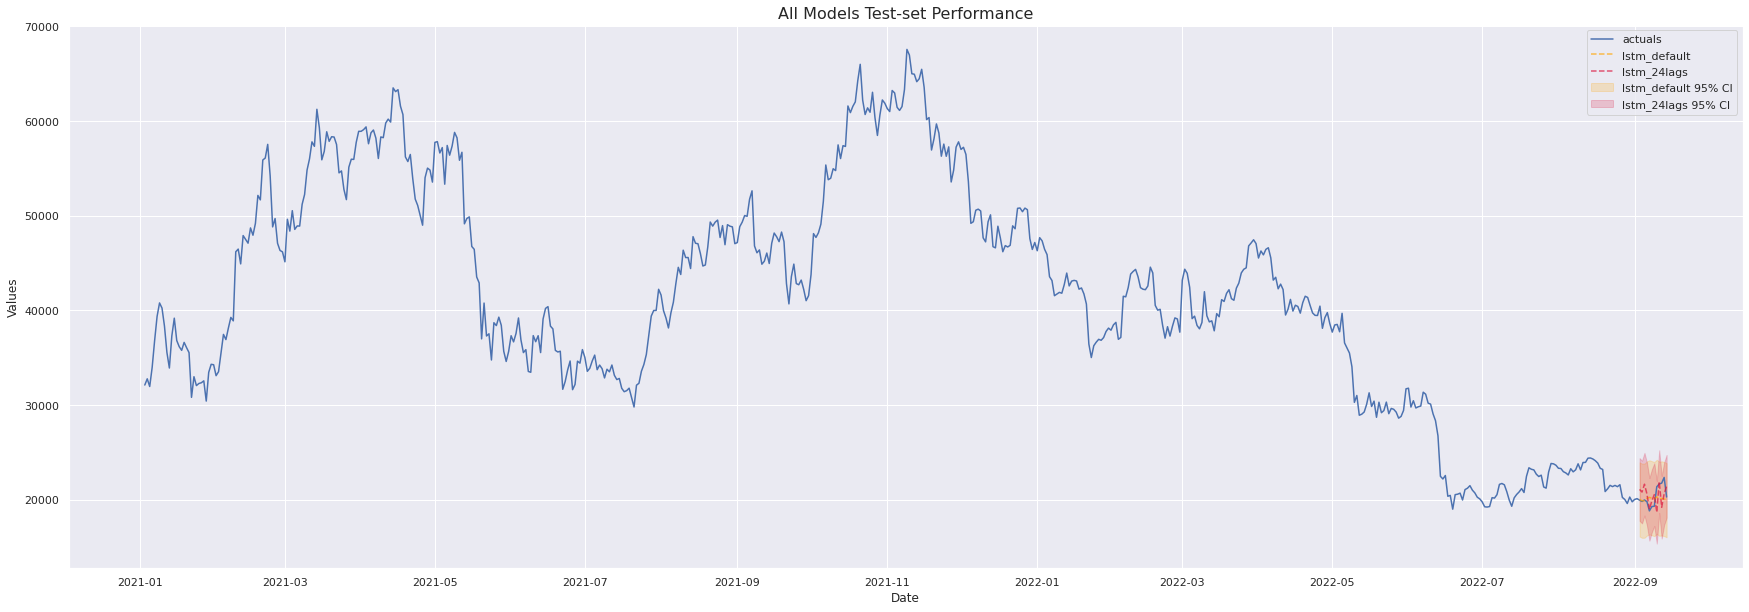

In [24]:
f.plot_test_set(ci=True)
plt.title('All Models Test-set Performance',size=16)
plt.show()

In [25]:
f.manual_forecast(call_me='lstm_24lags_5epochs',lags=24,epochs=5,validation_split=.2,shuffle=True)


Epoch 1/5
15/15 [==============================] - 3s 55ms/step - loss: 0.3568 - val_loss: 0.5388
Epoch 2/5
15/15 [==============================] - 0s 6ms/step - loss: 0.3016 - val_loss: 0.4498
Epoch 3/5
15/15 [==============================] - 0s 6ms/step - loss: 0.2469 - val_loss: 0.3629
Epoch 4/5
15/15 [==============================] - 0s 6ms/step - loss: 0.2036 - val_loss: 0.3038
Epoch 5/5
15/15 [==============================] - 0s 6ms/step - loss: 0.1663 - val_loss: 0.2545
Epoch 1/5
15/15 [==============================] - 2s 34ms/step - loss: 0.3775 - val_loss: 0.5913
Epoch 2/5
15/15 [==============================] - 0s 6ms/step - loss: 0.3388 - val_loss: 0.5340
Epoch 3/5
15/15 [==============================] - 0s 6ms/step - loss: 0.3004 - val_loss: 0.4700
Epoch 4/5
15/15 [==============================] - 0s 6ms/step - loss: 0.2617 - val_loss: 0.4136
Epoch 5/5
15/15 [==============================] - 0s 6ms/step - loss: 0.2227 - val_loss: 0.3610


Text(0.5, 1.0, 'All Models Test-set Performance')

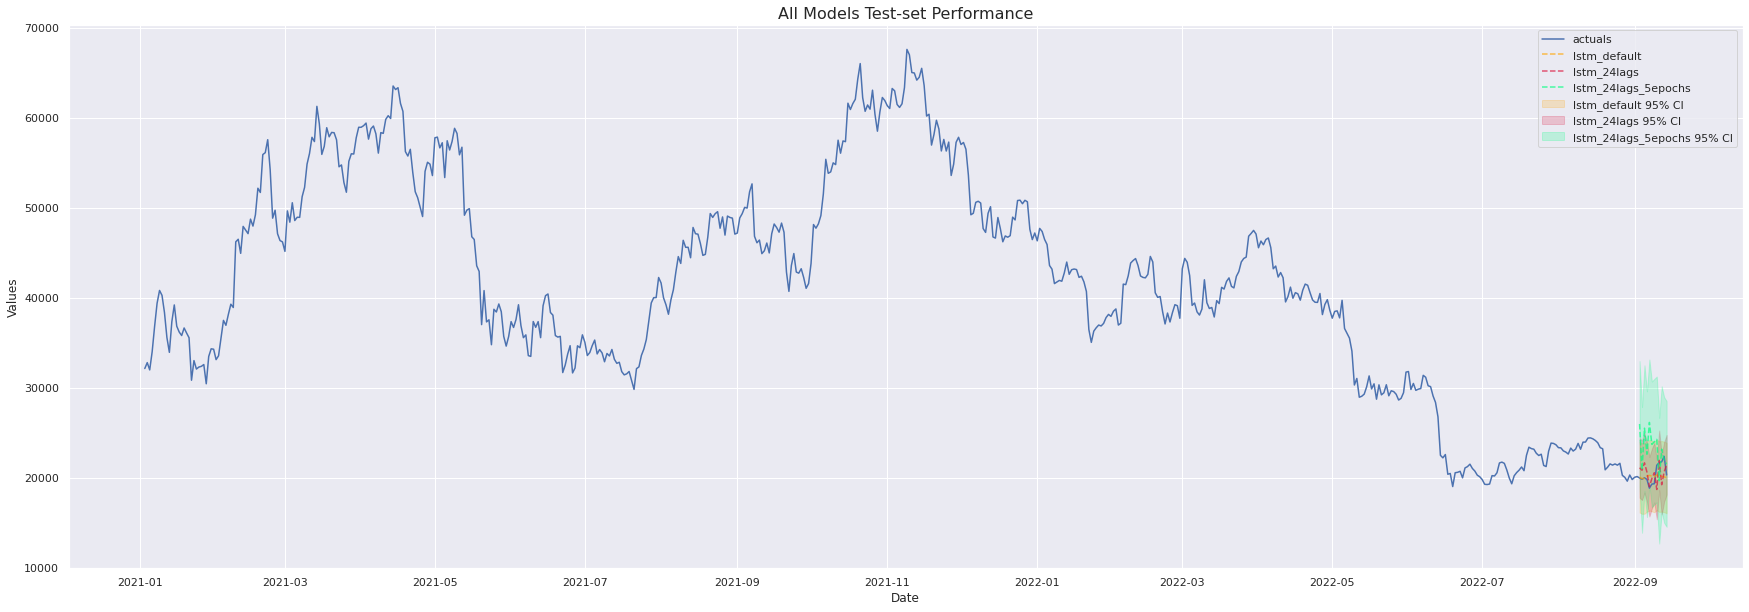

In [26]:
f.plot_test_set(ci=True)
plt.title('All Models Test-set Performance',size=16)
plt.show()

In [27]:
from tensorflow.keras.callbacks import EarlyStopping
f.manual_forecast(call_me='lstm_24lags_earlystop_3layers',
                  lags=24,
                  epochs=25,
                  validation_split=.2,
                  shuffle=True,
                  callbacks=EarlyStopping(monitor='val_loss',
                                          patience=5),
                  lstm_layer_sizes=(16,16,16),
                  dropout=(0,0,0))

Epoch 1/25
15/15 [==============================] - 6s 89ms/step - loss: 0.3995 - val_loss: 0.5740
Epoch 2/25
15/15 [==============================] - 0s 10ms/step - loss: 0.2941 - val_loss: 0.3639
Epoch 3/25
15/15 [==============================] - 0s 10ms/step - loss: 0.1878 - val_loss: 0.2198
Epoch 4/25
15/15 [==============================] - 0s 10ms/step - loss: 0.1130 - val_loss: 0.1652
Epoch 5/25
15/15 [==============================] - 0s 10ms/step - loss: 0.0991 - val_loss: 0.1493
Epoch 6/25
15/15 [==============================] - 0s 9ms/step - loss: 0.0929 - val_loss: 0.1354
Epoch 7/25
15/15 [==============================] - 0s 10ms/step - loss: 0.0930 - val_loss: 0.1486
Epoch 8/25
15/15 [==============================] - 0s 10ms/step - loss: 0.0873 - val_loss: 0.1421
Epoch 9/25
15/15 [==============================] - 0s 9ms/step - loss: 0.0873 - val_loss: 0.1319
Epoch 10/25
15/15 [==============================] - 0s 10ms/step - loss: 0.0842 - val_loss: 0.1363
Epoch 11/25

Text(0.5, 1.0, 'All Models Test-Set Performance')

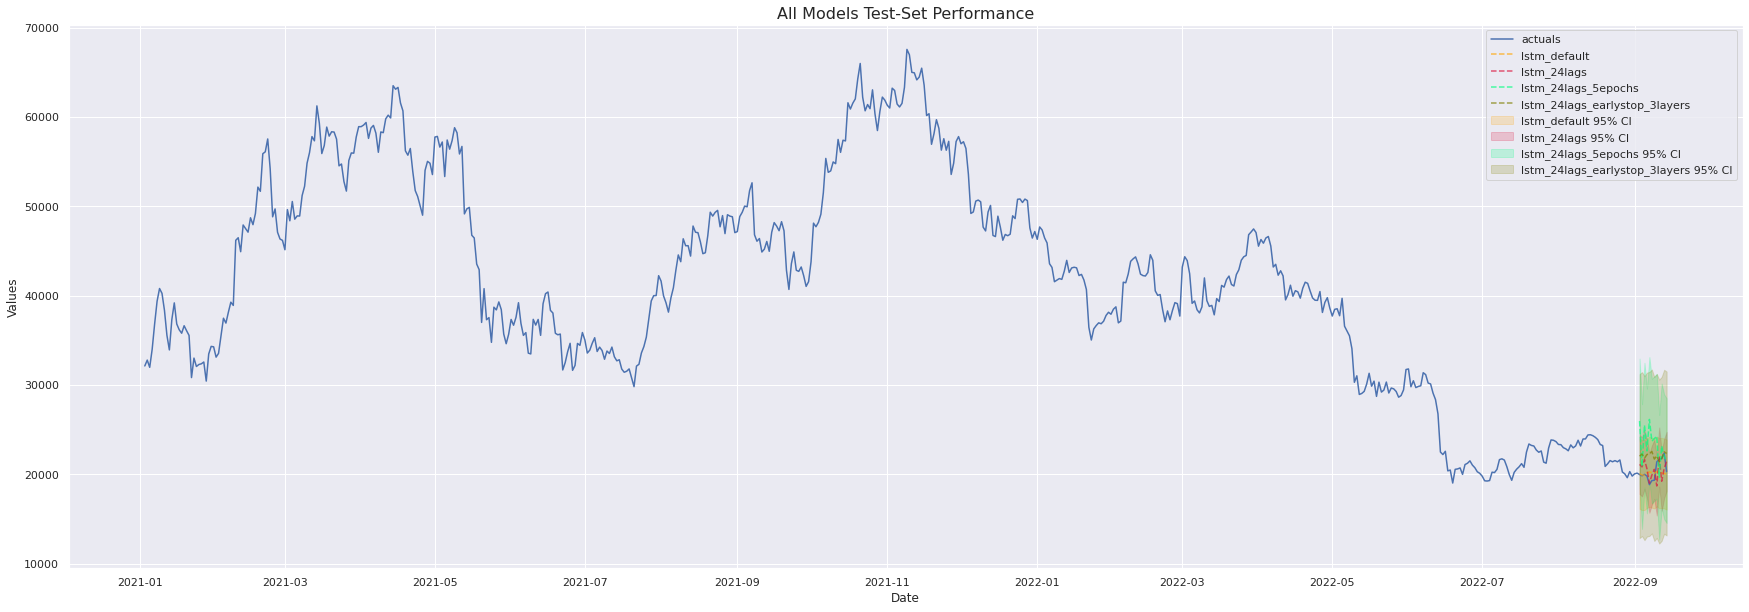

In [28]:
f.plot_test_set(ci=True)
plt.title('All Models Test-Set Performance',size=16)
plt.show()

Epoch 1/15
14/14 [==============================] - 7s 158ms/step - loss: 0.2208 - val_loss: 0.1821
Epoch 2/15
14/14 [==============================] - 0s 16ms/step - loss: 0.1109 - val_loss: 0.1985
Epoch 3/15
14/14 [==============================] - 0s 13ms/step - loss: 0.1034 - val_loss: 0.1932
Epoch 4/15
14/14 [==============================] - 0s 13ms/step - loss: 0.0932 - val_loss: 0.1432
Epoch 5/15
14/14 [==============================] - 0s 13ms/step - loss: 0.0936 - val_loss: 0.1335
Epoch 6/15
14/14 [==============================] - 0s 13ms/step - loss: 0.0874 - val_loss: 0.1525
Epoch 7/15
14/14 [==============================] - 0s 13ms/step - loss: 0.0802 - val_loss: 0.1306
Epoch 8/15
14/14 [==============================] - 0s 14ms/step - loss: 0.0776 - val_loss: 0.1413
Epoch 9/15
14/14 [==============================] - 0s 13ms/step - loss: 0.0787 - val_loss: 0.1348
Epoch 10/15
14/14 [==============================] - 0s 13ms/step - loss: 0.0810 - val_loss: 0.1315
Epoch 11

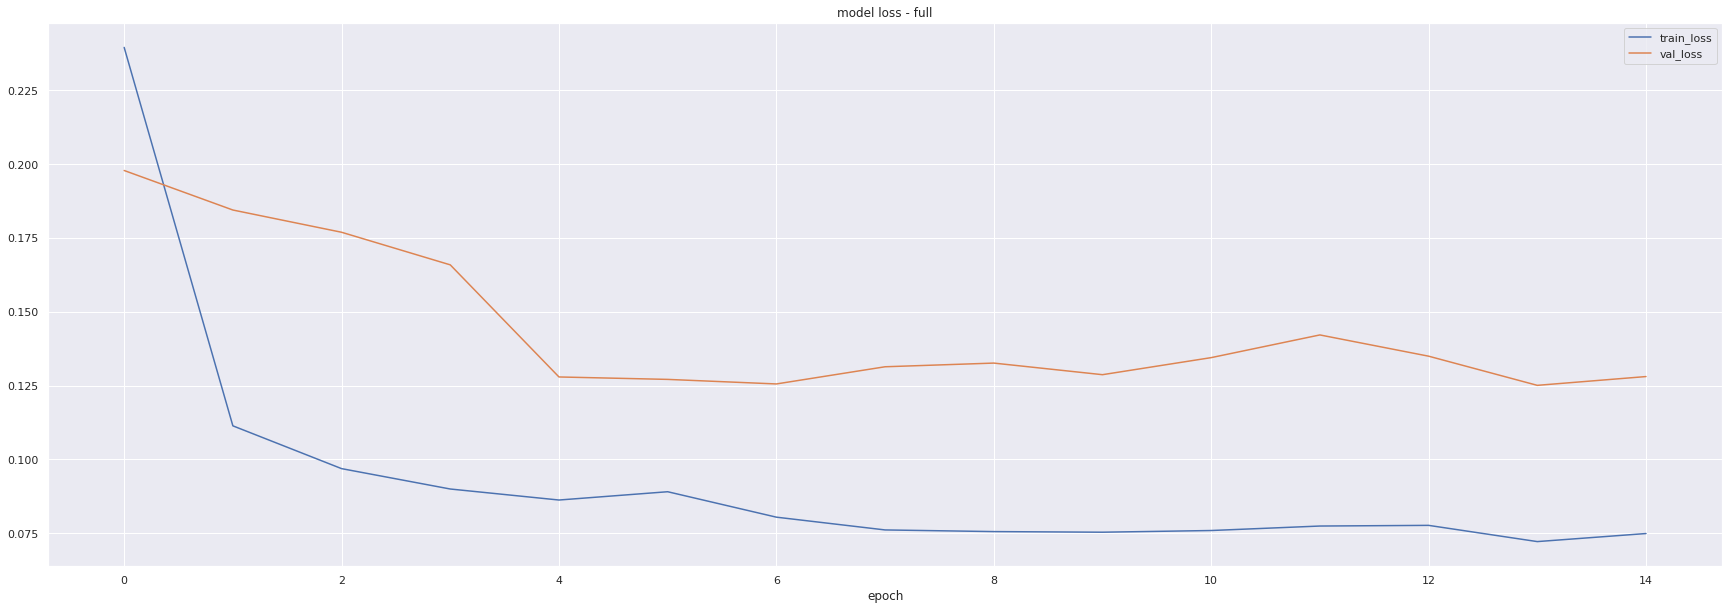

In [29]:
f.manual_forecast(call_me='lstm_24lags_4layers_15epochs',
                  lags=36,
                  batch_size=32,
                  epochs=15,
                  validation_split=.2,
                  shuffle=True,
                  activation='tanh',
                  optimizer='Adam',
                  learning_rate=0.001,
                  lstm_layer_sizes=(72,)*4,
                  dropout=(0,)*4,
                  plot_loss=True)

Text(0.5, 1.0, '24 Lags 4 Layers 15 Epochs Test-Set Performance')

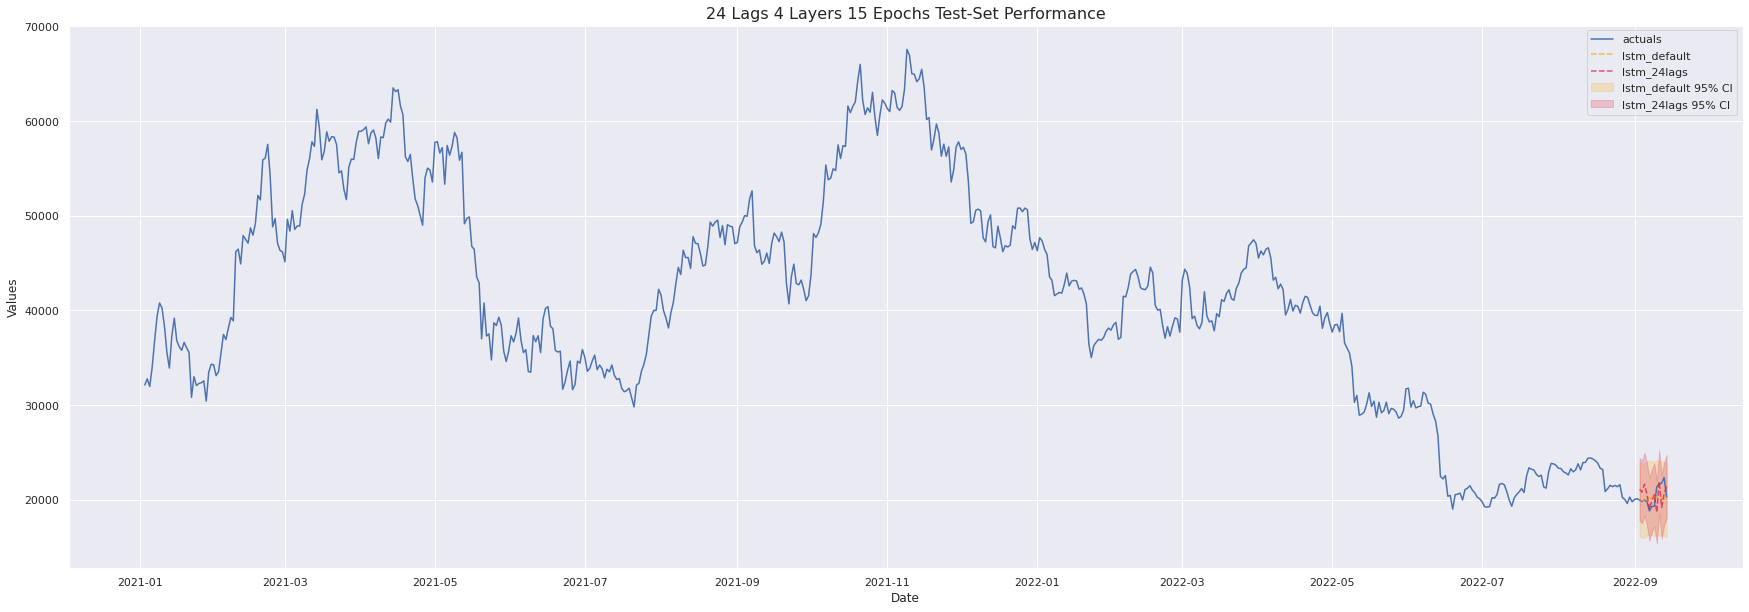

In [30]:
f.plot_test_set(order_by='LevelTestSetMAPE',models='top_2',ci=True)
plt.title('24 Lags 4 Layers 15 Epochs Test-Set Performance',size=16)
plt.show()

In [31]:
f.manual_forecast(call_me='lstm_best',
                  lags=36,
                  batch_size=16,
                  epochs=300,
                  validation_split=.2,
                  shuffle=True,
                  activation='tanh',
                  optimizer='Adam',
                  learning_rate=0.001,
                  lstm_layer_sizes=(100,)*15,
                  dropout=(0,)*15,
                  plot_loss=True)

Epoch 1/300
28/28 [==============================] - 24s 244ms/step - loss: 0.2498 - val_loss: 0.2758
Epoch 2/300
28/28 [==============================] - 1s 49ms/step - loss: 0.1589 - val_loss: 0.2010
Epoch 3/300
28/28 [==============================] - 1s 48ms/step - loss: 0.1537 - val_loss: 0.2012
Epoch 4/300
28/28 [==============================] - 1s 47ms/step - loss: 0.1492 - val_loss: 0.2222
Epoch 5/300
28/28 [==============================] - 1s 48ms/step - loss: 0.1447 - val_loss: 0.2952
Epoch 6/300
28/28 [==============================] - 1s 48ms/step - loss: 0.1415 - val_loss: 0.2387
Epoch 7/300
28/28 [==============================] - 1s 47ms/step - loss: 0.1344 - val_loss: 0.2340
Epoch 8/300
28/28 [==============================] - 1s 47ms/step - loss: 0.1354 - val_loss: 0.2444
Epoch 9/300
28/28 [==============================] - 1s 48ms/step - loss: 0.1488 - val_loss: 0.2777
Epoch 10/300
28/28 [==============================] - 1s 48ms/step - loss: 0.1455 - val_loss: 0.20

KeyboardInterrupt: ignored

In [ ]:
f.plot_test_set(order_by='LevelTestSetMAPE',models='top_2',ci=True)
plt.title('Top-2 Models Test-set Performance',size=16)
plt.show()